## Google Play Store Apps Analysis

# Project Overview
This project analyzes Google Play Store applications to understand
app categories, ratings, installs, and pricing patterns using Python.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("C:\harsha\googleplaystore.csv")
df = df.copy()

In [10]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Basic Cleaning

Remove duplicates

In [12]:
df.drop_duplicates(inplace=True)

Remove missing Ratings

In [13]:
df = df.dropna(subset=['Rating'])

Clean Installs

In [14]:
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df = df.dropna(subset=['Installs'])
df['Installs'] = df['Installs'].astype(int)

C:\Users\jadav\AppData\Local\Temp\ipykernel_25924\2897288205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(str)
C:\Users\jadav\AppData\Local\Temp\ipykernel_25924\2897288205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
C:\Users\jadav\AppData\Local\Temp\ipykernel_25924\2897288205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [15]:
df['Installs'].dtype

dtype('int64')

Clean Price

In [16]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].fillna(0)

In [17]:
df['Price'].dtype

dtype('float64')

Clean Size

In [18]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('M', '').str.replace('k', '')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

## Exploratory Data Analysis (EDA)

Apps per Category

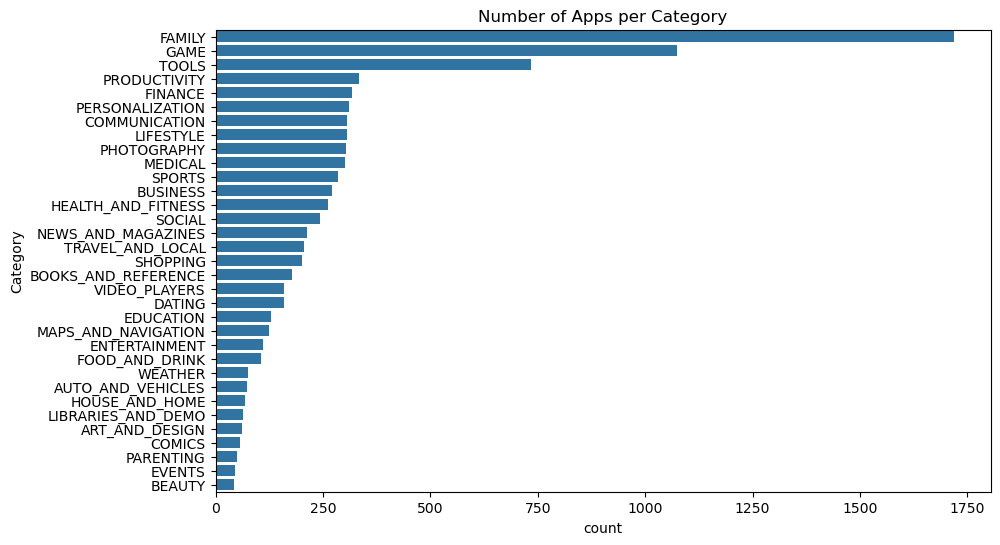

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title("Number of Apps per Category")
plt.savefig("images/googleplay_app_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

Rating Distribution


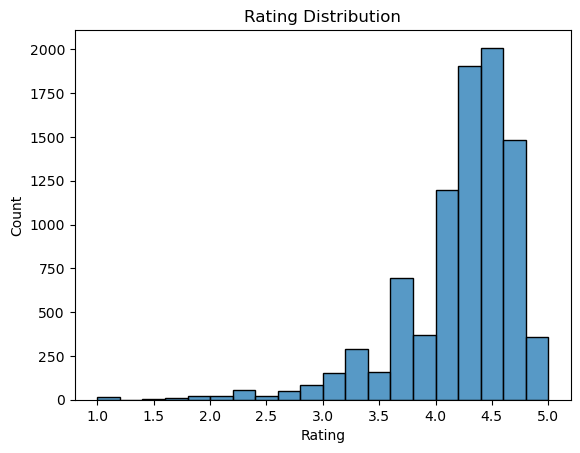

In [29]:
sns.histplot(df['Rating'], bins=20)
plt.title("Rating Distribution")
plt.savefig("images/googleplay_app_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

Free vs Paid Apps

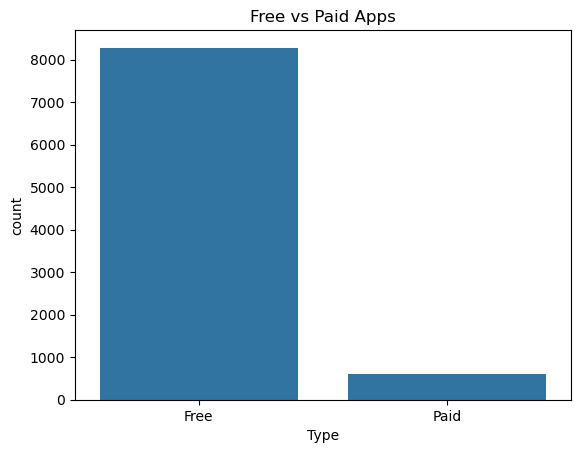

In [28]:
sns.countplot(x='Type', data=df)
plt.title("Free vs Paid Apps")
plt.savefig("images/googleplay_app_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

In [23]:
#Feature Engineering
df['Is_Free'] = df['Type'].map({'Free': 1, 'Paid': 0})

## Machine Learning

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
X = df[['Rating', 'Reviews', 'Installs']]
y = df['Is_Free']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9229904440697021


## Conclusion

This project explored Google Play Store app data to identify trends
in categories, ratings, installs, and pricing. Data cleaning and EDA
revealed important patterns, and a Random Forest model was used to
predict whether an app is free or paid.